I started by importing the needed libraries.
I also imported the CSV file so that I can Clean the Data and prepare the Data for Analysis.

In [4]:
import pandas as pd     
import seaborn as sns
import matplotlib.pyplot as plt               
import plotly.express as px   
import plotly.graph_objects as go 
from scipy import stats
import numpy as np

df = pd.read_csv(r'/Users/kevin.caster/Desktop/Homework School/Week 2 data wrangling/hotel_bookings_copy.csv')

I brought up the Data from the CSV file.

In [5]:
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

Checking for anomalies within the Data.

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Checking the dataset for missing values.

Agent and company columns had the largest amount of missing value, so I removed those columns.

In [8]:
df = df.drop(columns=['agent','company'])

Removing the duplicates from the data set

In [9]:
df= df.drop_duplicates()

Verifying their removal.

In [10]:
df.duplicated().sum()

0

Checking for Anomalies in numerical data.

In [11]:
# Get a list of numerical column names
numerical_columns = df.select_dtypes(['float64', 'int64']).columns.tolist()
print("Numerical columns:")
for column in numerical_columns:
    print(column)


Numerical columns:
is_canceled
lead_time
arrival_date_year
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests


Looking at the Quartiles, and other numerical data.

In [12]:
df.describe()

is_canceled     lead_time  arrival_date_year  \
count  87370.000000  87370.000000       87370.000000   
mean       0.274934     79.900595        2016.210312   
std        0.446484     86.055086           0.686075   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87370.000000               87370.000000   
mean                  26.838549                  15.815967   
std                   13.674188                   8.835216   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             87370.000000          87370.000000  87370.000000   
mean                  1.005414              2.625604      1.875873   
std                   1.031980              2.053693      0.626521   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              4.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  87366.000000  87370.000000       87370.000000            87370.000000   
mean       0.138681      0.010805           0.039087                0.030422   
std        0.455942      0.113515           0.193802                0.369200   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000     10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                    87370.000000     87370.000000          87370.000000   
mean                         0.184045         0.271661              0.749788   
std                          1.732148         0.727331             10.017213   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         72.000000        21.000000            391.000000   

                adr  required_car_parking_spaces  total_of_special_requests  
count  87370.000000                 87370.000000               87370.000000  
mean     106.343157                     0.084251                   0.698649  
std       55.016143                     0.281571                   0.831985  
min       -6.380000                     0.000000                   0.000000  
25%       72.000000                     0.000000                   0.000000  
50%       98.100000                     0.000000                   0.000000  
75%      134.000000                     0.000000                   1.000000  
max     5400.000000                     8.000000                   5.000000

The Columns with the highest anolmalies are Lead_time, adr, and Days_in_waiting_list. 

A simple way to plot these and show the anomalies is a scatter plot.

In [13]:
fig = px.scatter(df,y='adr')
fig.show()

fig = px.scatter(df,y='days_in_waiting_list' )
fig.show()

fig = px.scatter(df,y = 'lead_time')
fig.show()

You can see that ADR column has one very high number and even a negatives within the data set. 

Looking at the data set for anything remotely close to a time stamp.

In [14]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  assigned_room_type  \
0                          0       2  ...                   C   
1                          0       2  ...                   C   
2                          1       1  ...                   C   
3                          1       1  ...                   A   
4                          2       2  ...                   A   
...                      ...     ...  ...                 ...   
119385                     5       2  ...                   A   
119386                     5       3  ...                   E   
119387                     5       2  ...                   D   
119388                     5       2  ...                   A   
119389                     7       2  ...                   A   

        booking_changes deposit_type days_in_waiting_list customer_type  \
0                     3   No Deposit                    0     Transient   
1                     4   No Deposit                    0     Transient   
2                     0   No Deposit                    0     Transient   
3                     0   No Deposit                    0     Transient   
4                     0   No Deposit                    0     Transient   
...                 ...          ...                  ...           ...   
119385                0   No Deposit                    0     Transient   
119386                0   No Deposit                    0     Transient   
119387                0   No Deposit                    0     Transient   
119388                0   No Deposit                    0     Transient   
119389                0   No Deposit                    0     Transient   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0     

It looks as if reservation_status_date is already in that format but we must check the data types.

In [15]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

I need to convert the Reservation_status_date column to datetime format

In [16]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Verify the conversion
print(df['reservation_status_date'].dtype) 


datetime64[ns]


 Extracting day of the week from timestamp

In [17]:

df['reservation_day'] = df['reservation_status_date'].dt.day_name()

# Print the DataFrame with the new column
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

Combine year, month, and day columns into a new column representing the full date
'arrival_date','arrival_date_year,'arrival_date_month','arrival_date_day_of_month'

In [18]:

# Convert the year, month, and day columns to strings
df['arrival_date_year'] = df['arrival_date_year'].astype(str)
df['arrival_date_month'] = df['arrival_date_month'].astype(str)
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype(str)

# Combine year, month, and day columns into a new column representing the full date
df['arrival_date'] = df['arrival_date_year'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month']

# Print the DataFrame with the combined date column
print(df)

               hotel  is_canceled  lead_time arrival_date_year  \
0       Resort Hotel            0        342              2015   
1       Resort Hotel            0        737              2015   
2       Resort Hotel            0          7              2015   
3       Resort Hotel            0         13              2015   
4       Resort Hotel            0         14              2015   
...              ...          ...        ...               ...   
119385    City Hotel            0         23              2017   
119386    City Hotel            0        102              2017   
119387    City Hotel            0         34              2017   
119388    City Hotel            0        109              2017   
119389    City Hotel            0        205              2017   

       arrival_date_month  arrival_date_week_number arrival_date_day_of_month  \
0                    July                        27                         1   
1                    July                    

After combining arrival_date_year, arrival_date_month,arrival_date_day_of_month. I converted that to datetime format also.

In [19]:

df['arrival_date'] = pd.to_datetime(df['arrival_date']) 

# Verify the conversion
print(df['arrival_date'].dtype) 

datetime64[ns]


 Extracting day of the week from timestamp

In [20]:
df['arrival_day'] = df['arrival_date'].dt.day_name()

# Print the DataFrame with the new column
print(df)

               hotel  is_canceled  lead_time arrival_date_year  \
0       Resort Hotel            0        342              2015   
1       Resort Hotel            0        737              2015   
2       Resort Hotel            0          7              2015   
3       Resort Hotel            0         13              2015   
4       Resort Hotel            0         14              2015   
...              ...          ...        ...               ...   
119385    City Hotel            0         23              2017   
119386    City Hotel            0        102              2017   
119387    City Hotel            0         34              2017   
119388    City Hotel            0        109              2017   
119389    City Hotel            0        205              2017   

       arrival_date_month  arrival_date_week_number arrival_date_day_of_month  \
0                    July                        27                         1   
1                    July                    

Aggregating the Data
I Checked how many time there were uses of the city hotels verses Resort Hotel

In [73]:
# Calculate the frequency distribution as counts
frequency_counts = df['hotel'].value_counts().reset_index()

# Rename the columns for clarity
frequency_counts.columns = ['Hotel Type', 'Count']

# Calculate the frequency distribution as percentages
total_records = len(df)
frequency_percentages = (frequency_counts['Count'] / total_records) * 100

# Add the percentages as a new column
frequency_counts['Percentage'] = frequency_percentages

# Display the frequency distribution
print(frequency_counts)

     Hotel Type  Count  Percentage
0    City Hotel  53414   61.135401
1  Resort Hotel  33956   38.864599


This shows that the most popular month for arrival is August.

In [23]:

# Extract month from the 'arrival_date' column
df['arrival_month'] = df['arrival_date'].dt.month


frequency_distribution = df['arrival_month'].value_counts().reset_index()
frequency_distribution.columns = ['arrival_month', 'Frequency']
print(frequency_distribution)

    arrival_month  Frequency
0               8      11254
1               7      10053
2               5       8353
3               4       7906
4               6       7764
5               3       7511
6              10       6934
7               9       6688
8               2       6095
9              12       5129
10             11       4992
11              1       4691


This shows the most popular days to stay. 
Number one on the list is Monday followed by Friday.

In [24]:
frequency_distribution = df['arrival_day'].value_counts().reset_index()
frequency_distribution.columns = ['arrival_day', 'Frequency']
print(frequency_distribution)

  arrival_day  Frequency
0      Monday      14157
1      Friday      13344
2    Saturday      13112
3    Thursday      12988
4      Sunday      11484
5   Wednesday      11282
6     Tuesday      11003


This show how may Reservations Came in by Year

In [102]:


# Group the DataFrame by year and count the number of reservations
total_reservations_per_year = df.groupby('year').size().reset_index(name='Total Reservations')

# Create the bar graph using Plotly Express
fig = px.bar(total_reservations_per_year, x='year', y='Total Reservations', 
             title='Total Reservations by Year', labels={'year': 'Year', 'Total Reservations': 'Total Reservations'})

# Annotate the number of reservations at the top of each bar
for index, row in total_reservations_per_year.iterrows():
    fig.add_annotation(x=row['year'], y=row['Total Reservations'], 
                       text=str(row['Total Reservations']), showarrow=False, font=dict(size=25))

# Show the plot
fig.show()

In [110]:

# Extract month from 'reservation_status_date'
df['reservation_month'] = df['reservation_status_date'].dt.month

# Display the DataFrame with the new column
print(df[['reservation_status_date', 'reservation_month']].head())


  reservation_status_date  reservation_month
0              2015-07-01                  7
1              2015-07-01                  7
2              2015-07-02                  7
3              2015-07-02                  7
4              2015-07-03                  7


In [117]:

# Group the DataFrame by month and count the number of reservations
reservations_by_month = df.groupby('reservation_month').size().reset_index(name='Total Reservations')

# Create the bar graph using Plotly Express
fig = px.bar(reservations_by_month, x='reservation_month', y='Total Reservations', 
             title='Total Reservations by Month', labels={'reservation_month': 'Month', 'Total Reservations': 'Total Reservations'})
for index, row in reservations_by_month.iterrows():
    fig.add_annotation(x=row['reservation_month'], y=row['Total Reservations'], 
                       text=str(row['Total Reservations']), showarrow=False, font=dict(size=20))


# Show the plot
fig.show()

This shows the most frequent reservation date, which just so happens to be Valentines Day. Possibly could use this to boost Revenue.

In [25]:
frequency_distribution = df['reservation_status_date'].value_counts().reset_index()
frequency_distribution.columns = ['reservation_status_date', 'Frequency']
print(frequency_distribution)

    reservation_status_date  Frequency
0                2016-02-14        210
1                2017-05-25        204
2                2015-10-21        199
3                2016-03-28        196
4                2016-10-06        196
..                      ...        ...
921              2015-02-27          1
922              2015-03-11          1
923              2015-03-12          1
924              2015-03-18          1
925              2015-02-02          1

[926 rows x 2 columns]


This shows the averge reservations to be around 20,000 per year

In [154]:

# Calculate the total number of reservations by year
total_reservations_by_year = df.groupby(df['reservation_status_date'].dt.year).size()

# Calculate the average number of reservations over the years
average_reservations_over_years = total_reservations_by_year.mean()

# Create the line plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=total_reservations_by_year.index, y=total_reservations_by_year.values,
                         mode='lines', name='Total Reservations by Year'))
fig.add_hline(y=average_reservations_over_years, line_dash="dash", line_color="red",
              annotation_text=f'Average Reservations: {average_reservations_over_years:.2f}',
              annotation_position="bottom right")
fig.update_layout(title='Total Reservations Over the Years',
                  xaxis_title='Year', yaxis_title='Total Reservations')
fig.show()

The average Daily Rate increased over the years
the average daily rate in 2014 was $57 while in 2017 it was nearly $120.

In [118]:

# Group the DataFrame by year and calculate the mean ADR
adr_by_year = df.groupby('year')['adr'].mean().reset_index(name='Average ADR')

# Create the line graph using Plotly Express
fig = px.line(adr_by_year, x='year', y='Average ADR', 
              title='Average Daily Rate (ADR) by Year', labels={'year': 'Year', 'Average ADR': 'Average ADR'})

# Show the plot
fig.show()

Figuring out the the ADR Reservations by year to calulate revenue totals.

In [156]:

# Group the DataFrame by year and sum the ADR values
total_adr_per_year = df.groupby('year')['adr'].sum().apply(lambda x: '${:,.2f}'.format(x))


# Print the total ADR for each year
print("Total ADR per Reservation year:")
print(total_adr_per_year)

Total ADR per Reservation year:
year
2014          $690.80
2015    $1,236,378.76
2016    $4,470,145.25
2017    $3,583,986.78
Name: adr, dtype: object


I then Plotted this so that you could accurately see the total Revenue by year based on Reservations

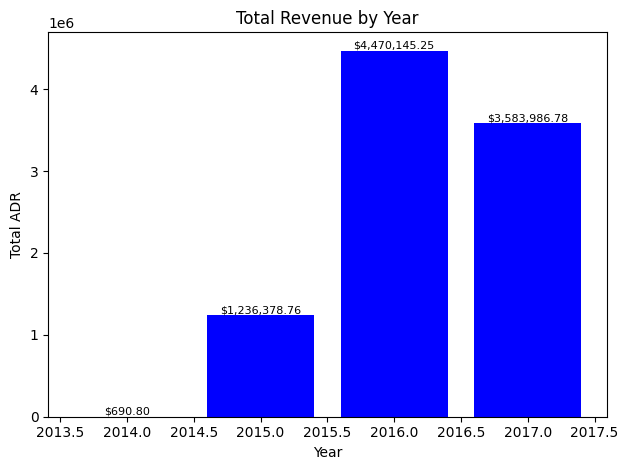

In [147]:


# Plot the bar graph
bars = plt.bar(total_adr_per_year.index, total_adr_per_year.values, color='blue')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total ADR')

# Annotate dollar amount at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '${:,.2f}'.format(height),
             ha='center', va='bottom', fontsize=8)


# Set a tighter layout
plt.tight_layout()

plt.show()

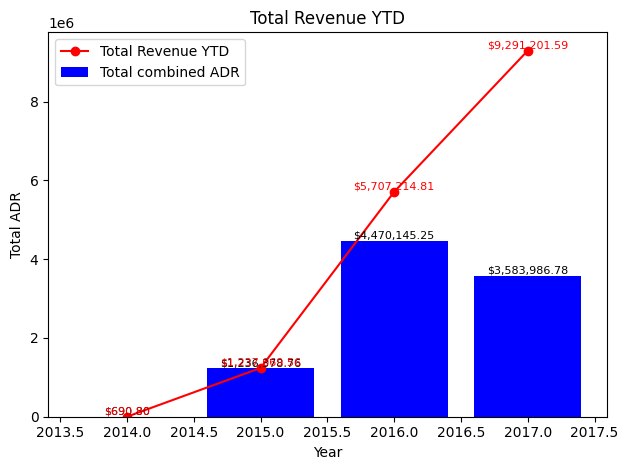

In [93]:

# Group the DataFrame by year and sum the ADR values
total_adr_per_year = df.groupby('year')['adr'].sum()

# Calculate total revenue YTD
total_revenue_ytd = total_adr_per_year.cumsum()

# Plot the bar graph
bars = plt.bar(total_adr_per_year.index, total_adr_per_year.values, color='blue', label='Total combined ADR')
plt.plot(total_adr_per_year.index, total_revenue_ytd, color='red', marker='o', linestyle='-', label='Total Revenue YTD')

plt.title('Total Revenue YTD')
plt.xlabel('Year')
plt.ylabel('Total ADR')

# Annotate dollar amount at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '${:,.2f}'.format(height),
             ha='center', va='bottom', fontsize=8)

# Annotate total revenue YTD on the plot
for year, revenue in zip(total_adr_per_year.index, total_revenue_ytd):
    plt.text(year, revenue, '${:,.2f}'.format(revenue),
             ha='center', va='bottom', fontsize=8, color='red')

plt.legend()

# Set a tighter layout
plt.tight_layout()

plt.show()

This shows percentage wise how much people chose the City hotel over the Resort hotel.

In [74]:


# Plot the pie chart
fig = px.pie(frequency_counts, values='Count', names='Hotel Type', title='Hotel Type Distribution')
fig.show()

In [125]:


# Group the DataFrame by hotel and calculate the total revenue (sum of ADR)
total_revenue_by_hotel = df.groupby('hotel')['adr'].sum().reset_index(name='Total Revenue')

# Create the bar graph using Plotly Express
fig = px.bar(total_revenue_by_hotel, x='hotel', y='Total Revenue', 
             title='Total Revenue by Hotel', labels={'hotel': 'Hotel', 'Total Revenue': 'Total Revenue'})
for index, row in total_revenue_by_hotel.iterrows():
    fig.add_annotation(x=row['hotel'], y=row['Total Revenue'], 
                       text='${:,.2f}'.format(row['Total Revenue']), showarrow=False, font=dict(size=20))

# Show the plot
fig.show()

The combined total Revenue from both sources was $9,291,201.59


In [127]:
# Calculate the total revenue for resort hotels and city hotels
total_revenue_resort = df[df['hotel'] == 'Resort Hotel']['adr'].sum()
total_revenue_city = df[df['hotel'] == 'City Hotel']['adr'].sum()

# Calculate the combined total revenue
total_revenue_combined = total_revenue_resort + total_revenue_city

print("Total Revenue for Resort Hotels: ${:,.2f}".format(total_revenue_resort))
print("Total Revenue for City Hotels: ${:,.2f}".format(total_revenue_city))
print("Combined Total Revenue: ${:,.2f}".format(total_revenue_combined))

Total Revenue for Resort Hotels: $3,362,878.46
Total Revenue for City Hotels: $5,928,323.13
Combined Total Revenue: $9,291,201.59
